In [11]:
import pandas as pd
import numpy as np
from features import df_to_features, round_up_rows

from sklearn.preprocessing import StandardScaler
# from lpredictors import MiniXgboostPredictor
# from laughter_prediction.predictors import MiniXgboostPredictor

from sklearn.externals import joblib

In [4]:
# nrows = 50000
# features_df = pd.read_csv("../features/feaures_pyAA_all_10ms.csv", nrows=nrows)
# features_df = round_up_rows(features_df)

features_df = pd.read_csv("../features/feaures_pyAA_all_10ms.csv")

In [5]:
mini_df = features_df
nfeatures = mini_df.shape[1] - 2
X = mini_df.iloc[:, :nfeatures].as_matrix()
Y = mini_df.IS_LAUGHTER.as_matrix()
y = Y

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X.shape

(3008500, 102)

In [12]:
model_path = "../models/XGBClassifier_3kk_pyAA10.pkl"
model = joblib.load(model_path)

In [13]:
model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=nan, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [14]:
y_pred = model.predict_proba(X)

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_ROC_curve(y_score, y_expected):
    fpr, tpr, thresholds = roc_curve(y_expected, y_score)
    roc_auc = auc(fpr, tpr)
        
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

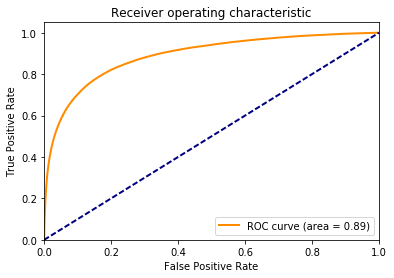

In [23]:
plot_ROC_curve(y_pred[:, 1], y)

In [19]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
# Compute ROC curve and ROC area for each class
# roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

In [27]:
thresholds[tpr >= 0.4][0]

0.23201084

numpy.ndarray